# Predicting Heart Disease Using Machine Learning

1. problem defination: the main aim of the project is to find a person is having heart disease or not on several parameters


2. Data: data is downloaded from ucl repositarory url:https://archive.ics.uci.edu/ml/datasets/heart+Disease 


3. data dictonary:


4. evaluation: we are evaluating model beyond accuracy
   * roc curve and auc
   * confusion matrix
   * classification report
   * precision
   * f1-score
   * recall
   
   
5. modelling: this is a classification problem so we are using logistic regression to predict the results

In [43]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [2]:
#  importing and reading dataset
df=pd.read_csv("heart-disease.csv")

In [3]:
# checking for na values present in dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploring the dataset

* in this we finding relation between different columns with target column

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


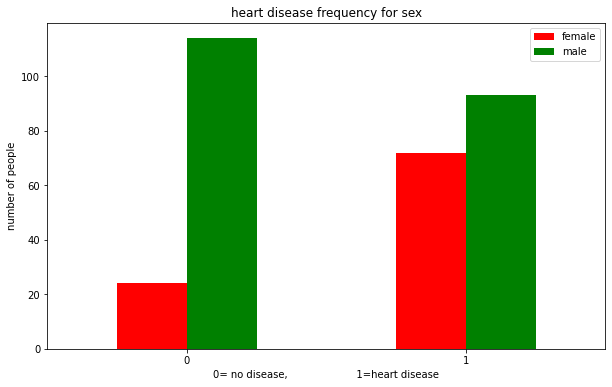

In [8]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['red','green'])
plt.title('heart disease frequency for sex')
plt.xlabel('0= no disease,                      1=heart disease')
plt.ylabel('number of people')
plt.legend(['female','male'])
plt.xticks(rotation=0);

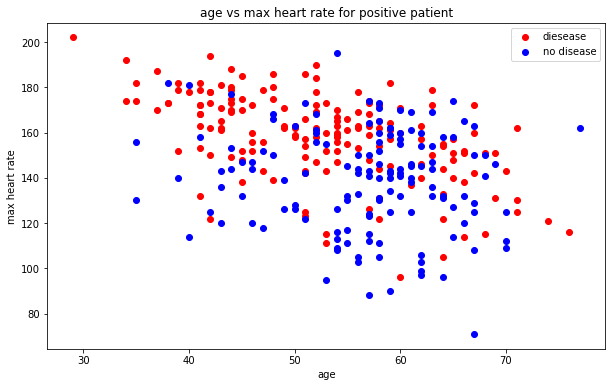

In [9]:
# age vs  max heart rate for target

plt.figure(figsize=(10,6))
#creating scatter plot with postive patenint 
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.title('age vs max heart rate for positive patient');

#creating pattern for negative patient
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue');
plt.legend(['diesease','no disease']);

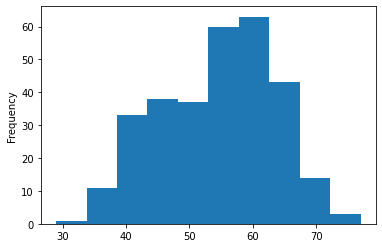

In [10]:
# check distribution of the age column with histogram
df.age.plot.hist();

In [11]:
# chest pain type vs heart disease
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


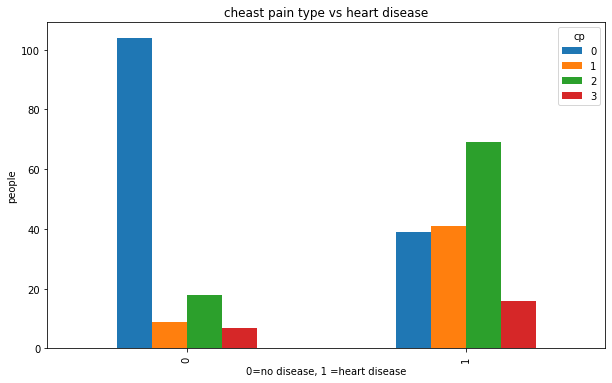

In [12]:
pd.crosstab(df.target,df.cp).plot(kind='bar',figsize=(10,6))
plt.title('cheast pain type vs heart disease')
plt.xlabel('0=no disease, 1 =heart disease')
plt.ylabel('people');

#  correlation matrix

* for knowing realation between differnt elements we use this technique

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


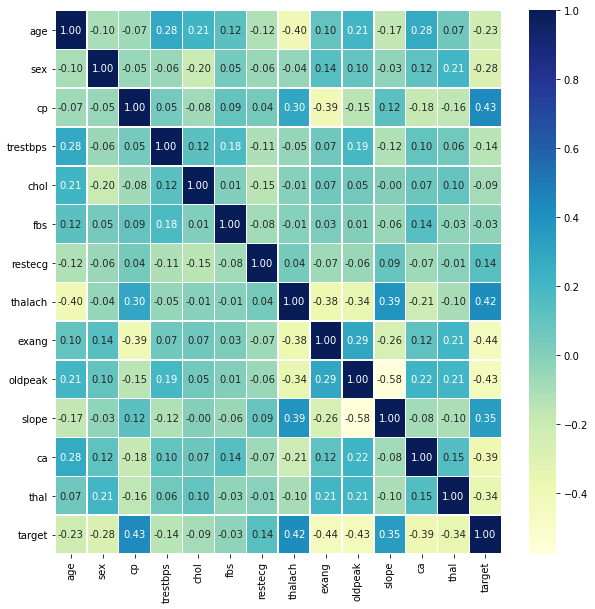

In [14]:
# plotting correlation matrix on heat map
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu'
                )

# Data split

In [15]:
# creating x & y for our data
x=df.drop('target',axis=1)
y=df['target']

In [16]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# modelling

*  we are using Logistic Regression to solve the problem

In [17]:
# importing random forest classifier
np.random.seed(97)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [18]:
np.random.seed(97)
# model selection
model=LogisticRegression()
    
# fitting data to model    
model.fit(x_train,y_train)

#predicting accuracy with model
acc=model.score(x_test,y_test)
acc

C:\Users\vrunda\anaconda3\envs\heart\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

# Hyper parameter tunning for model imporvement

In [19]:
#hyper parameter tunning for logistic regression
log_reg_grid={'C':np.logspace(-4,4,20),
              'solver':['liblinear']}



# using randomized search cv

In [20]:
#randomized search cv for logistic regression  parameters

np.random.seed(97)


#for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#fit the model 

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [22]:
rs_log_reg.score(x_test,y_test)

0.9016393442622951

# evaluating our machine learning classifier beyond accuracy

* roc curve and auc curve
* confusion matrix
* classification report
* precision
* f1-score
* recall

In [23]:
#make prediction with tunned model
y_preds=rs_log_reg.predict(x_test)

In [24]:
y_preds

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

* roc curve and auc

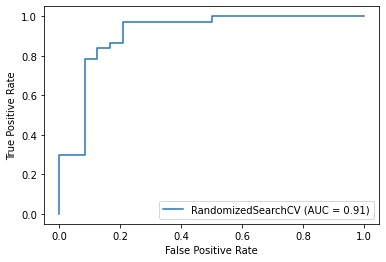

In [25]:
#plotting roc curve

from sklearn.metrics import plot_roc_curve


plot_roc_curve(rs_log_reg,x_test,y_test);

* confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[19  5]
 [ 1 36]]


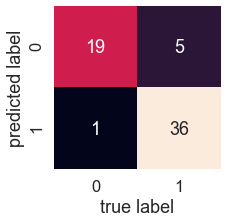

In [27]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    
    """"
    plotting confusion matix with sns heatmap
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test,y_preds)

* classification report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        37

    accuracy                           0.90        61
   macro avg       0.91      0.88      0.89        61
weighted avg       0.91      0.90      0.90        61



# evalating accuracy,precision , f-1 score on cross validated matrix

In [29]:
from sklearn.model_selection import cross_val_score
#create a new classifier with best parameters

clf=LogisticRegression(solver='liblinear', C=0.08858667904100823)


In [30]:
#cross validated accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy')

In [31]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [32]:
cv_acc=np.mean(cv_acc)
cv_acc

0.834808743169399

In [33]:
# cross validated precision
cv_precision=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8182683982683983

In [34]:
# cross validated recall
cv_recall=cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9030303030303031

In [35]:
# cross validated f1-score
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8572876223964057

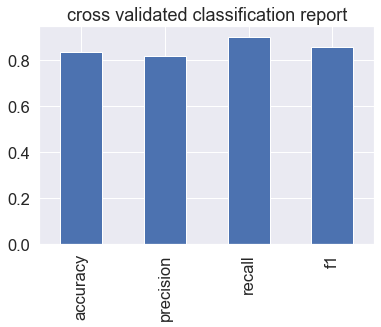

In [36]:
# create a data frame for all in one 

cv_metrix=pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_precision,
                        "recall":cv_recall,
                        "f1":cv_f1},index=[0])

cv_metrix.T.plot.bar(title="cross validated classification report",legend=False)

# feature importance

In [37]:
# fit an instance for logistic regression

clg=LogisticRegression(solver='liblinear', C=0.08858667904100823)
clg.fit(x_train,y_train);

In [38]:
#check coef
clg.coef_

array([[ 0.00653075, -0.56656327,  0.60707681, -0.01575373, -0.00317211,
         0.0055262 ,  0.2091779 ,  0.02602913, -0.32966721, -0.47810677,
         0.22275704, -0.54984128, -0.40676166]])

In [39]:
# match coef with colimn names
feature_dict=dict(zip(df.columns, list(clg.coef_[0])))
feature_dict

{'age': 0.006530747138104569,
 'sex': -0.5665632704846084,
 'cp': 0.607076811616414,
 'trestbps': -0.015753732938265864,
 'chol': -0.003172108163902467,
 'fbs': 0.005526203155646891,
 'restecg': 0.20917790334644373,
 'thalach': 0.026029131954200393,
 'exang': -0.3296672119903957,
 'oldpeak': -0.47810676777657907,
 'slope': 0.22275704103381905,
 'ca': -0.5498412848921203,
 'thal': -0.4067616615420401}

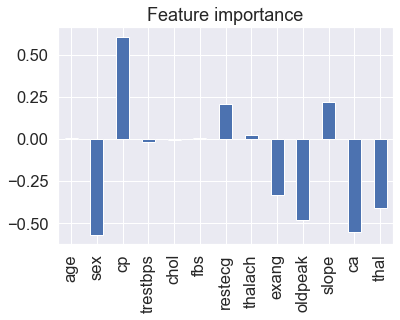

In [40]:
# visiualizing features
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance',legend=False);